# Dataset description from authors:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
- X2: Gender (1 = male; 2 = female).  
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
- X4: Marital status (1 = married; 2 = single; 3 = others).  
- X5: Age (year).  
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.   
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [60]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import load_credit_card_dataset

Load dataset from UC Irvine Machine Learning Repository  
Dataset credits:  
Yeh, I. (2009). Default of Credit Card Clients [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

In [61]:
# Load dataset
df = load_credit_card_dataset()


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

# Data overview

In [62]:
print(df.head())

       X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X15    X16    X17  \
0   20000   2   2   1  24   2   2  -1  -1   -2  ...      0      0      0   
1  120000   2   2   2  26  -1   2   0   0    0  ...   3272   3455   3261   
2   90000   2   2   2  34   0   0   0   0    0  ...  14331  14948  15549   
3   50000   2   2   1  37   0   0   0   0    0  ...  28314  28959  29547   
4   50000   1   2   1  57  -1   0  -1   0    0  ...  20940  19146  19131   

    X18    X19    X20   X21   X22   X23  Y  
0     0    689      0     0     0     0  1  
1     0   1000   1000  1000     0  2000  1  
2  1518   1500   1000  1000  1000  5000  0  
3  2000   2019   1200  1100  1069  1000  0  
4  2000  36681  10000  9000   689   679  0  

[5 rows x 24 columns]


In [63]:
# Rename columns with more descriptive names
df.columns = [
    "Credit_Amount",         # X1
    "Gender",                # X2
    "Education",             # X3
    "Marital_Status",        # X4
    "Age",                   # X5
    "Pay_Status_09",         # X6
    "Pay_Status_08",         # X7
    "Pay_Status_07",         # X8
    "Pay_Status_06",         # X9
    "Pay_Status_05",         # X10
    "Pay_Status_04",         # X11
    "Bill_Amount_09",        # X12
    "Bill_Amount_08",        # X13
    "Bill_Amount_07",        # X14
    "Bill_Amount_06",        # X15
    "Bill_Amount_05",        # X16
    "Bill_Amount_04",        # X17
    "Pay_Amount_09",         # X18
    "Pay_Amount_08",         # X19
    "Pay_Amount_07",         # X20
    "Pay_Amount_06",         # X21
    "Pay_Amount_05",         # X22
    "Pay_Amount_04",         # X23
    "Default"                #Y
]

# Check the updated column names
df.head()

,Credit_Amount,Gender,Education,Marital_Status,Age,Pay_Status_09,Pay_Status_08,Pay_Status_07,Pay_Status_06,Pay_Status_05,...,Bill_Amount_06,Bill_Amount_05,Bill_Amount_04,Pay_Amount_09,Pay_Amount_08,Pay_Amount_07,Pay_Amount_06,Pay_Amount_05,Pay_Amount_04,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [64]:
# Display information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Credit_Amount   30000 non-null  int64
 1   Gender          30000 non-null  int64
 2   Education       30000 non-null  int64
 3   Marital_Status  30000 non-null  int64
 4   Age             30000 non-null  int64
 5   Pay_Status_09   30000 non-null  int64
 6   Pay_Status_08   30000 non-null  int64
 7   Pay_Status_07   30000 non-null  int64
 8   Pay_Status_06   30000 non-null  int64
 9   Pay_Status_05   30000 non-null  int64
 10  Pay_Status_04   30000 non-null  int64
 11  Bill_Amount_09  30000 non-null  int64
 12  Bill_Amount_08  30000 non-null  int64
 13  Bill_Amount_07  30000 non-null  int64
 14  Bill_Amount_06  30000 non-null  int64
 15  Bill_Amount_05  30000 non-null  int64
 16  Bill_Amount_04  30000 non-null  int64
 17  Pay_Amount_09   30000 non-null  int64
 18  Pay_Amount_08   30000 non-

From this summary we can see that all columns are int64, which is suitable for numerical analysis. However, some columns (e.g. Gender, Education) are categorical by nature. We may need to convert these integer-encoded categorical types for more accurate analysis and visualisation.  
Each column has 30000 entries with no missing values, which is ideal since we won’t need to handle any missing data at this stage.

In [65]:
# Get a quick summary of the numeric features
df.describe()

,Credit_Amount,Gender,Education,Marital_Status,Age,Pay_Status_09,Pay_Status_08,Pay_Status_07,Pay_Status_06,Pay_Status_05,...,Bill_Amount_06,Bill_Amount_05,Bill_Amount_04,Pay_Amount_09,Pay_Amount_08,Pay_Amount_07,Pay_Amount_06,Pay_Amount_05,Pay_Amount_04,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Initial Target Variable Inspection
Knowing the distribution of the target variable (default payment) is essential. If there’s an imbalance (e.g., many more “No” defaults than “Yes”), specific handling during modeling (like balanced sampling or weighting) might be needed.

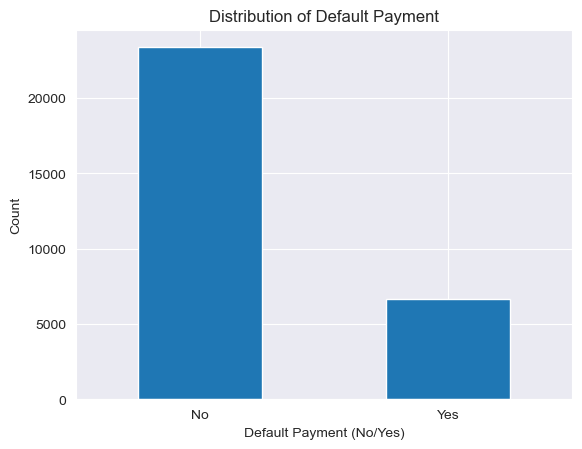

In [66]:
# Check the distribution of the target variable
df["Default"].value_counts()

# Visualize the class distribution
df["Default"].value_counts().plot(kind='bar')
plt.title('Distribution of Default Payment')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.xlabel('Default Payment (No/Yes)')
plt.ylabel('Count')
plt.show()

As we discovered before, all values in dataset are stored in int64 format. It would be beneficial to change the data type of Gender, Education, Marital_Status, Pay Amounts and Default to categorical, as these columns represent specific, non-numeric categories.
Why convert to categorical? 
- Categorical data types are easier to analyze and interpret in visualizations and statistical summaries.
- Categorical types reduce memory usage, which is helpful for larger datasets.
- Some machine learning models handle categorical variables differently and may require encoding. Defining these as categorical will help when you later prepare them for modeling.

In [67]:
print(df.columns)

Index(['Credit_Amount', 'Gender', 'Education', 'Marital_Status', 'Age',
       'Pay_Status_09', 'Pay_Status_08', 'Pay_Status_07', 'Pay_Status_06',
       'Pay_Status_05', 'Pay_Status_04', 'Bill_Amount_09', 'Bill_Amount_08',
       'Bill_Amount_07', 'Bill_Amount_06', 'Bill_Amount_05', 'Bill_Amount_04',
       'Pay_Amount_09', 'Pay_Amount_08', 'Pay_Amount_07', 'Pay_Amount_06',
       'Pay_Amount_05', 'Pay_Amount_04', 'Default'],
      dtype='object')


In [68]:
# Convert Gender, Education, and Marital_Status to categorical types
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

# Convert Default to categorical
df['Default'] = df['Default'].astype('category')

# Convert repayment status columns to categorical
pay_status_columns = [
    "Pay_Status_09", "Pay_Status_08", "Pay_Status_07",
    "Pay_Status_06", "Pay_Status_05", "Pay_Status_04"
]
df[pay_status_columns] = df[pay_status_columns].astype('category')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Credit_Amount   30000 non-null  int64   
 1   Gender          30000 non-null  category
 2   Education       30000 non-null  category
 3   Marital_Status  30000 non-null  category
 4   Age             30000 non-null  int64   
 5   Pay_Status_09   30000 non-null  category
 6   Pay_Status_08   30000 non-null  category
 7   Pay_Status_07   30000 non-null  category
 8   Pay_Status_06   30000 non-null  category
 9   Pay_Status_05   30000 non-null  category
 10  Pay_Status_04   30000 non-null  category
 11  Bill_Amount_09  30000 non-null  int64   
 12  Bill_Amount_08  30000 non-null  int64   
 13  Bill_Amount_07  30000 non-null  int64   
 14  Bill_Amount_06  30000 non-null  int64   
 15  Bill_Amount_05  30000 non-null  int64   
 16  Bill_Amount_04  30000 non-null  int64   
 17  Pay_Amount_0

# Data cleaning
In data overview phase we noticed some discrepancies in values of several variables:
- Education. Contains values ranging from 0 to 6, with some values outside the documented range (0 and 6).
- Marital_Status: The range is from 0 to 3, but values like 0 may need investigation since the original description didn’t mention them.
- Pay_Status (Sep – Apr): Contains -2 value, which also is not documented.
We'll manage each case separately.

## Education
The Education column has values from 0 to 6, while the documented range includes only 1 (graduate school), 2 (university), 3 (high school), and 4 (others). The presence of 0, 5, and 6 suggests these may be anomalies or additional categories not originally described.  
To make a decision we need to understand the scope of problem.

In [69]:
# Count occurrences and calculate percentages for each category in the Education column
education_counts = df['Education'].value_counts(dropna=False)  # Including NaN if any
education_percentages = (education_counts / len(df)) * 100

# Combine counts and percentages into a DataFrame for better readability
education_distribution = pd.DataFrame({
    'Count': education_counts,
    'Percentage': education_percentages
})

# Display the result
education_distribution

,Count,Percentage
Education,,
2,14030,46.766667
1,10585,35.283333
3,4917,16.390000
5,280,0.933333
4,123,0.410000
6,51,0.170000
0,14,0.046667


Good news are that percentage of such values in dataset is insignificant.
There are few options how to handle these unexpected values:
1. Treat as Missing Data (Replace with NaN): If we assume that values like 0, 5, and 6 are erroneous or undefined, we can replace them with NaN and handle them as missing data.
2. Map to ‘Others’ Category (Value 4): If we believe 0, 5, and 6 represent unspecified or “other” educational levels, we could map these values to 4.
3. Keep as Separate Categories: If we suspect these values have specific meanings, we could keep them as distinct categories for further exploration.
4. As the percentage of these undefined values is insignificant, we can drop these values 

We'll choose to map to 'Others' category values 0,5 and 6 as it is common to assume unspecified values to 'other'. Also the percentage of these values is insignificant and we assume that it won't affect our models.

In [70]:
#Drop the undefined Education values
df = df[~df['Education'].isin([0, 5, 6])]

df['Education'] = df['Education'].astype('category')
df['Education'] = df['Education'].cat.remove_unused_categories()

# Verify the result
df['Education'].value_counts(dropna=False)

Education
2    14030
1    10585
3     4917
4      123
Name: count, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29655 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Credit_Amount   29655 non-null  int64   
 1   Gender          29655 non-null  category
 2   Education       29655 non-null  category
 3   Marital_Status  29655 non-null  category
 4   Age             29655 non-null  int64   
 5   Pay_Status_09   29655 non-null  category
 6   Pay_Status_08   29655 non-null  category
 7   Pay_Status_07   29655 non-null  category
 8   Pay_Status_06   29655 non-null  category
 9   Pay_Status_05   29655 non-null  category
 10  Pay_Status_04   29655 non-null  category
 11  Bill_Amount_09  29655 non-null  int64   
 12  Bill_Amount_08  29655 non-null  int64   
 13  Bill_Amount_07  29655 non-null  int64   
 14  Bill_Amount_06  29655 non-null  int64   
 15  Bill_Amount_05  29655 non-null  int64   
 16  Bill_Amount_04  29655 non-null  int64   
 17  Pay_Amount_09   2

## Marital status
The Marital_Status column has values from 0 to 3, but only 1 (married), 2 (single), and 3 (others) are documented in the dataset description. The presence of 0 is undocumented and may need attention. Here are some options for handling this value:
1. Treat 0 as Missing Data (Replace with NaN): If 0 is assumed to represent an unknown or undefined marital status, we can replace it with NaN to treat it as missing data.
2. Map 0 to the ‘Others’ Category: If we assume that 0 could mean “other” or “undefined,” we could map it to the 3 category (“others”).
3. Keep 0 as a Separate Category: If there’s a possibility that 0 represents a distinct group, we could leave it as a separate category.
4. Drop these values as their amount is insignificant.

In [72]:
# Count occurrences and calculate percentages for each category in the Education column
marital_counts = df['Marital_Status'].value_counts(dropna=False)  # Including NaN if any
marital_percentages = (marital_counts / len(df)) * 100

# Combine counts and percentages into a DataFrame for better readability
marital_distribution = pd.DataFrame({
    'Count': marital_counts,
    'Percentage': marital_percentages
})

# Display the result
marital_distribution

,Count,Percentage
Marital_Status,,
2,15806,53.299612
1,13477,45.445962
3,318,1.072332
0,54,0.182094


We decided to drop these values

In [73]:
#Drop the undefined Education values
df = df[~df['Marital_Status'].isin([0])]

df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Marital_Status'] = df['Marital_Status'].cat.remove_unused_categories()

# Verify the result
df['Marital_Status'].value_counts(dropna=False)

Marital_Status
2    15806
1    13477
3      318
Name: count, dtype: int64

## Pay_Status (Sep – Apr)


In [74]:
# List of Pay_Status columns for each month from September to April
pay_status_columns = ["Pay_Status_09", "Pay_Status_08", "Pay_Status_07",
                      "Pay_Status_06", "Pay_Status_05", "Pay_Status_04"]

# Initialize an empty dictionary to store counts and percentages for each month
pay_status_distribution = {}

for column in pay_status_columns:
    # Count occurrences and calculate percentages for each category in the current Pay_Status column
    counts = df[column].value_counts(dropna=False)
    percentages = (counts / len(df)) * 100

    # Combine counts and percentages into a DataFrame for the current column
    pay_status_distribution[column] = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })

# Display results for each Pay_Status column
for column, distribution in pay_status_distribution.items():
    print(f"\n{column} Distribution")
    print(distribution)


Pay_Status_09 Distribution
               Count  Percentage
Pay_Status_09                   
 0             14499   48.981453
-1              5633   19.029763
 1              3662   12.371204
-2              2708    9.148340
 2              2640    8.918618
 3               320    1.081045
 4                76    0.256748
 5                24    0.081078
 8                19    0.064187
 6                11    0.037161
 7                 9    0.030404

Pay_Status_08 Distribution
               Count  Percentage
Pay_Status_08                   
 0             15476   52.282017
-1              5990   20.235803
 2              3904   13.188744
-2              3722   12.573900
 3               326    1.101314
 4                97    0.327692
 1                28    0.094591
 5                25    0.084457
 7                20    0.067565
 6                12    0.040539
 8                 1    0.003378

Pay_Status_07 Distribution
               Count  Percentage
Pay_Status_07            

We see that amount of -2 is significant. Dropping it is not an option, as we may lead to explainable data loss.
Perhaps we'll assume that this might represent a unique scenario, so we'll leave it as a separate category and will try to find explanation to it.  
Let's create bar plots for each Pay_Status feature. This will give us visual representation of the count in each category, including -2.  
This might help identify any patterns or trends in the repayment statuses over the months, especially if -2 appears frequently. 

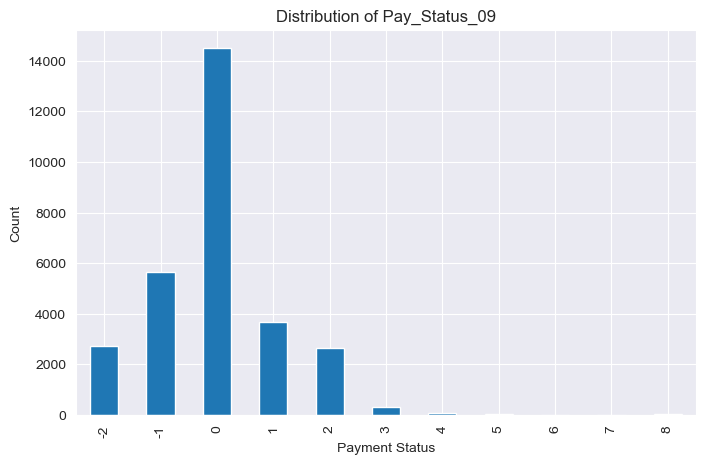

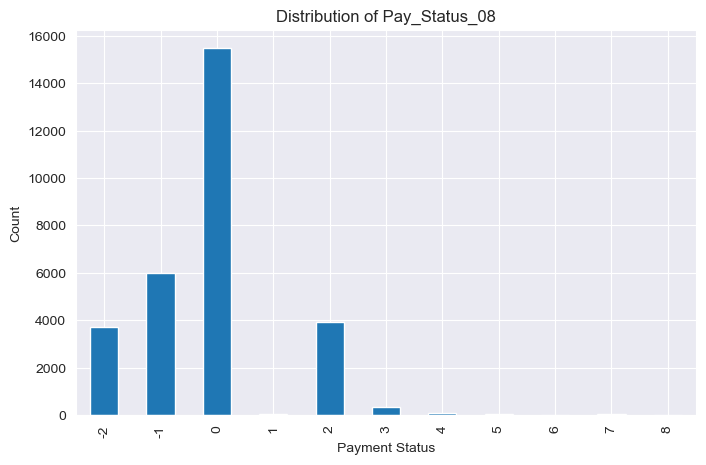

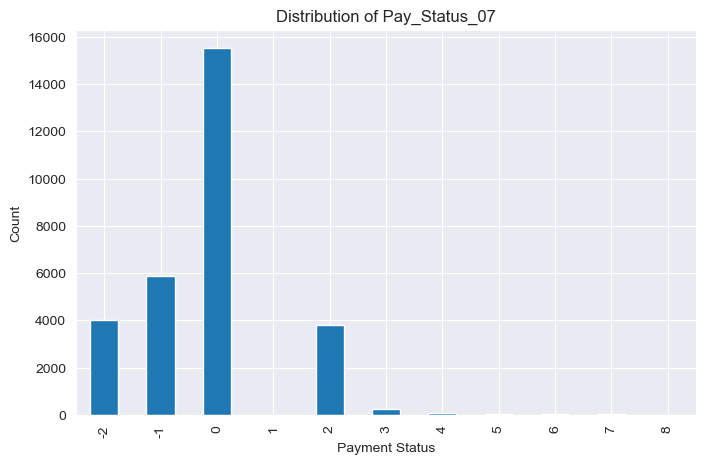

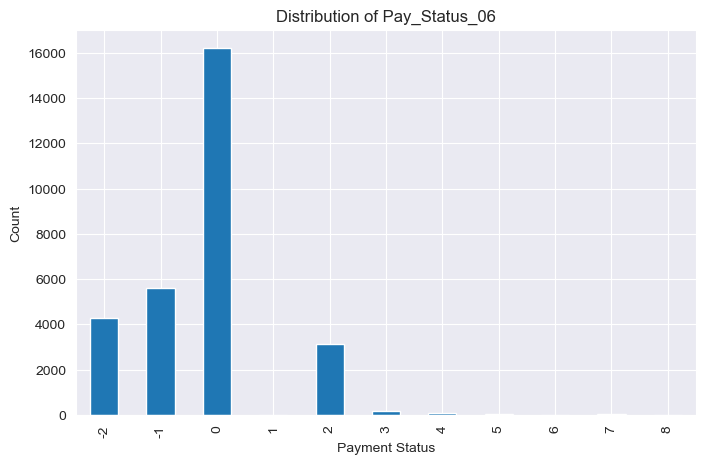

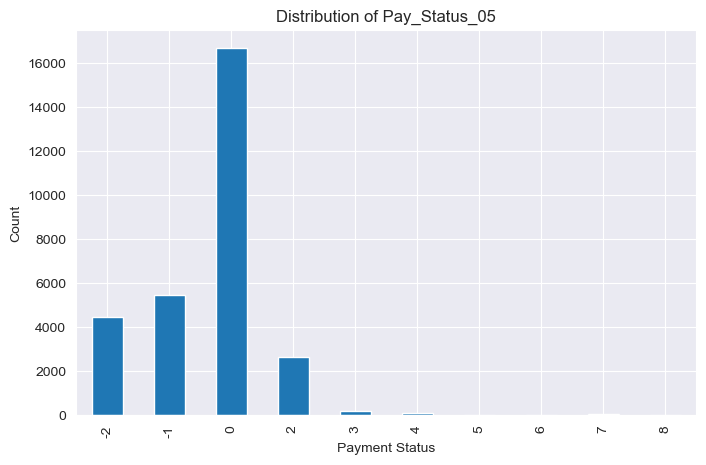

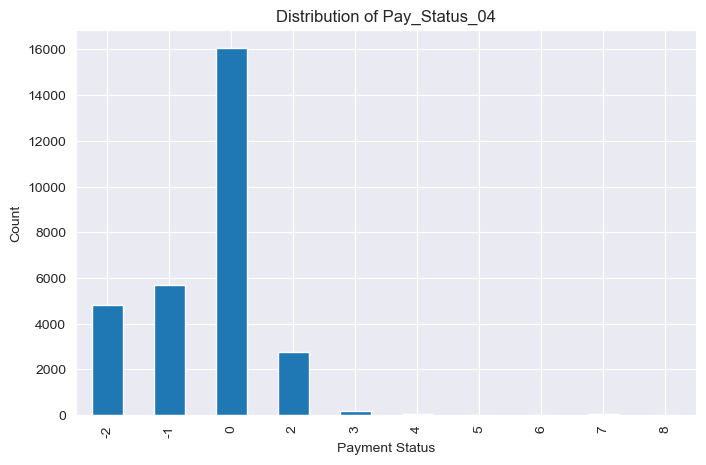

In [75]:
# Plot the distribution of each Pay_Status column
for column in pay_status_columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts(sort=False).plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Payment Status')
    plt.ylabel('Count')
    plt.show()

- 0 (No Delay): This category is the most common across all months, indicating that a large portion of clients pay on time.
- -1 (Paid Duly): This status, indicating early or on-time payments, also appears frequently, though less so than 0.
- -2 This category has a noticeable count each month, confirming it may represent a distinct status, possibly indicating a unique payment condition or behavior.
- Delayed Payments (1, 2, etc.): While less frequent, delayed payment statuses (like 1 and 2) are present, indicating some clients have delays ranging from one to several months.

To understand if -2 and other statuses impact the likelihood of default, we can calculate and visualize the default rate for each Pay_Status category. This will show whether certain statuses correlate with a higher default probability.

In [76]:
# Calculate default rate by Pay_Status for each month without permanently changing the Default column
pay_status_default_rates = {}

for column in pay_status_columns:
    # Group by Pay_Status and calculate the default rate for each category
    default_rate = df.groupby(column, observed=False)['Default'].apply(lambda x: x.astype(int).mean() * 100)
    pay_status_default_rates[column] = default_rate

# Display results for each month
# Convert the dictionary to a DataFrame
default_rates_df = pd.DataFrame(pay_status_default_rates)

# Display the DataFrame
print(default_rates_df)

# for column, rate in pay_status_default_rates.items():
#     print(f"\nDefault Rate by {column}")
#     print(rate)

    Pay_Status_09  Pay_Status_08  Pay_Status_07  Pay_Status_06  Pay_Status_05  \
-2      13.404727      18.511553      18.748448      19.477490      19.870507   
-1      16.918161      16.126878      15.742794      16.094000      16.368613   
 0      12.883647      16.011889      17.592473      18.458405      19.000240   
 1      34.161660      17.857143      25.000000      50.000000            NaN   
 2      69.583333      55.840164      51.657023      52.482495      54.337027   
 3      76.250000      61.656442      58.227848      61.111111      63.841808   
 4      68.421053      51.546392      57.894737      66.666667      60.714286   
 5      54.166667      60.000000      57.142857      51.428571      58.823529   
 6      54.545455      75.000000      60.869565      40.000000      75.000000   
 7      77.777778      60.000000      81.481481      82.758621      82.758621   
 8      57.894737       0.000000      66.666667      50.000000     100.000000   

    Pay_Status_04  
-2     

1.	High Default Rates for Delayed Payments: As expected, the default rate tends to increase as the delay in payment increases. For instance, values 7 and 8 (indicating severe delays) consistently show high default rates, often exceeding 70% and reaching 100% in some months. This trend indicates that clients with significant delays are at a high risk of defaulting.
2. Moderate Default Rates for Mild Delays:	Payment statuses 1 and 2, which indicate shorter delays, also show elevated default rates but are generally lower than those with more extended delays (e.g., statuses 4 and above).
3.	Default Rates for -1 and 0 (No Delay): Clients with a status of -1 (indicating early payment) or 0 (on-time payment) show much lower default rates. This is expected, as timely payments are a good indicator of low default risk.
4.	Default Rate for -2: Interestingly, the -2 status shows a default rate that varies from around 13% to 20% across months. This rate is generally higher than 0 (on-time payments) but lower than most delayed payment categories. This pattern suggests that -2 may indicate a unique group that isn’t as reliable as on-time payers but is also less risky than those with significant delays.

To visualize the default rates across different Pay_Status values for each month, we can create line plots for each Pay_Status column. This will show how the default rate changes with each status category across the months, highlighting trends and allowing easy comparison between categories.

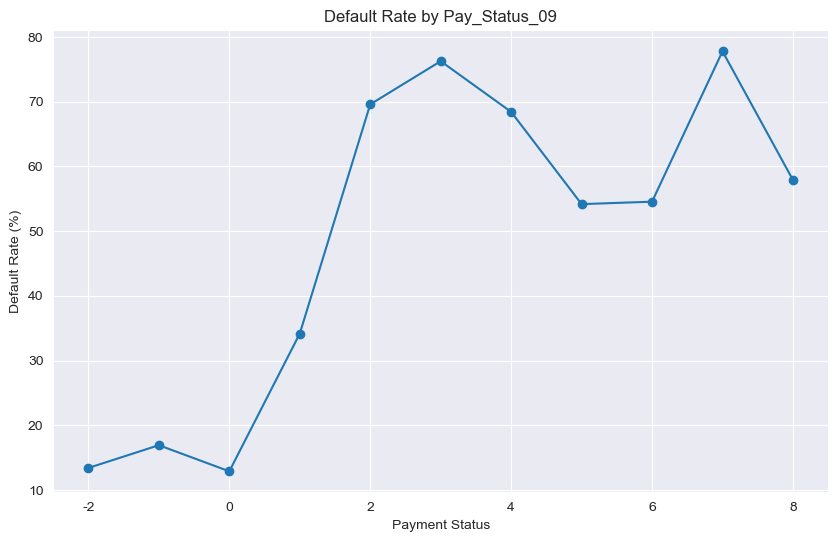

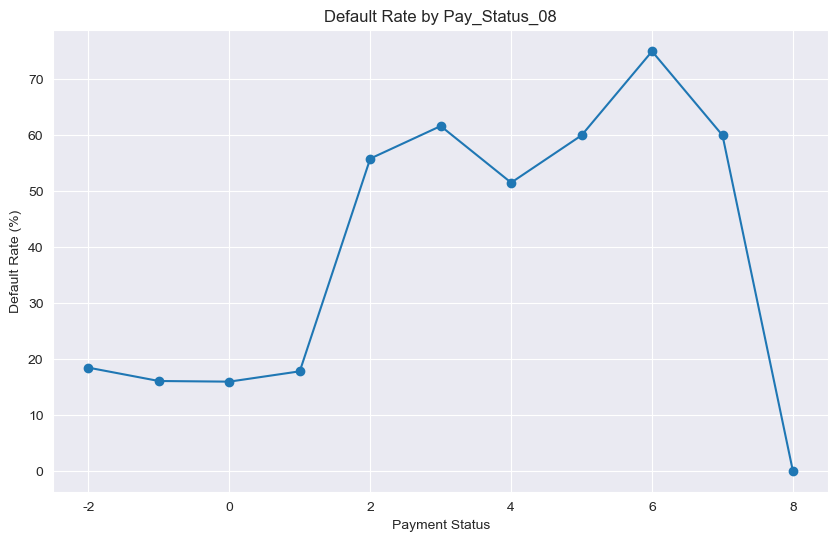

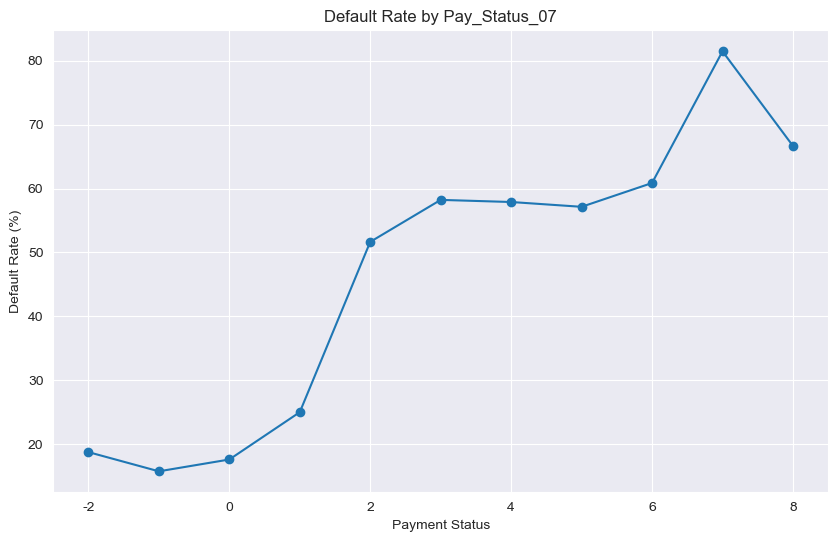

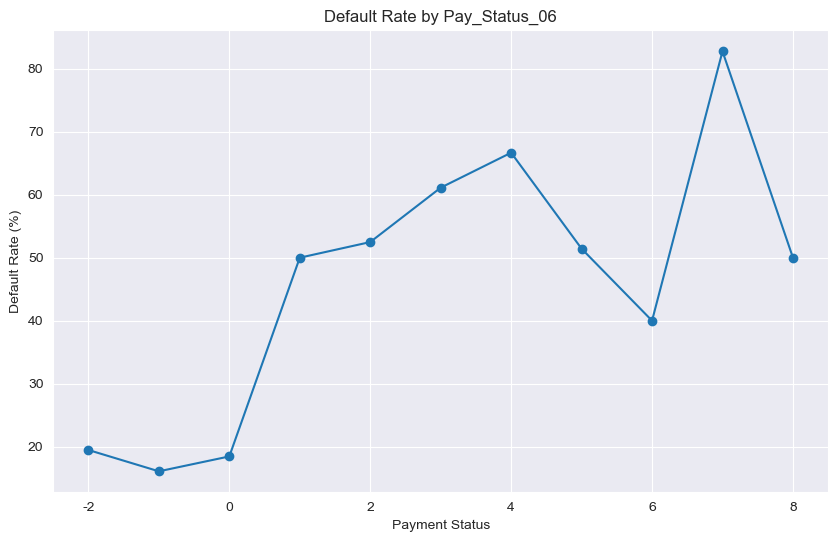

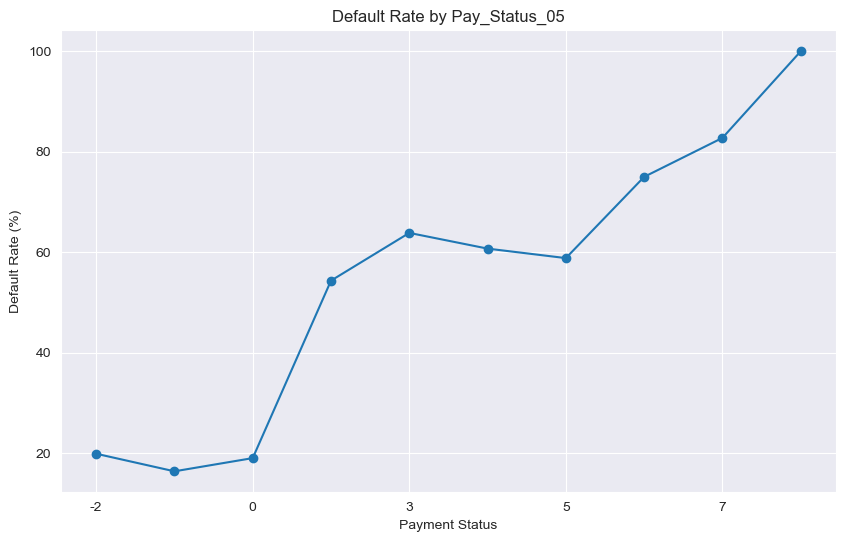

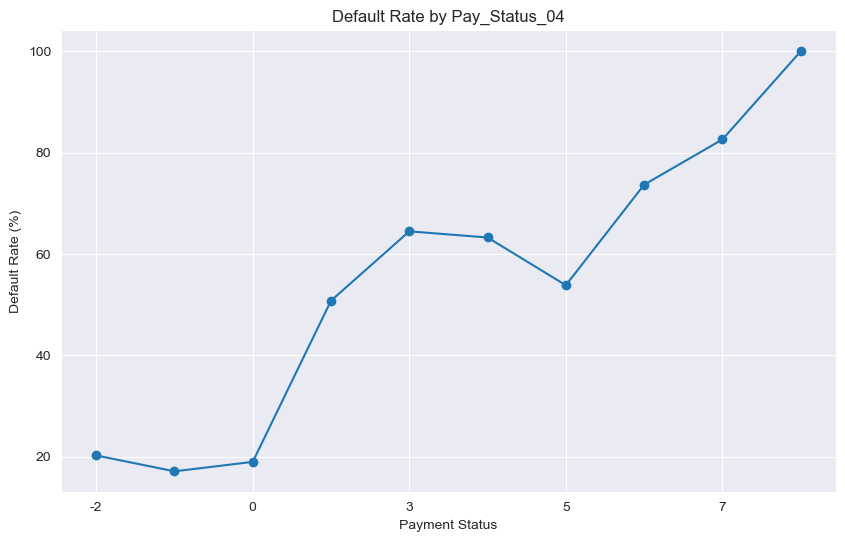

In [77]:
import matplotlib.pyplot as plt

# Plot default rates for each Pay_Status column
for column, rate in pay_status_default_rates.items():
    plt.figure(figsize=(10, 6))
    rate.sort_index().plot(kind='line', marker='o')
    plt.title(f'Default Rate by {column}')
    plt.xlabel('Payment Status')
    plt.ylabel('Default Rate (%)')
    plt.grid(True)
    plt.show()

### Key Observations
We see a clear pattern of increasing default rates with delay. Across most months, there is a clear trend where the default rate increases as the delay in payment (indicated by Pay_Status values from 1 onward) gets longer. The highest default rates are often associated with severe delays (5 and above), with some reaching close to or even above 80%.
Relatively Low Default Rate for -1 and 0. Payment statuses of -1 (paid duly) and 0 (on-time payment) have relatively low default rates, consistently below 20%. This trend supports the assumption that timely payments are correlated with lower risk of default.
Unique Behavior of -2 Category. The -2 category generally shows default rates between 13% and 20% across months. This rate is notably higher than 0 (on-time payments) but lower than most delayed statuses. This pattern suggests that -2 represents a distinct group of clients who may have unique repayment behaviors that do not align with typical delayed or on-time payment statuses.

### Implications for Modeling
Since default rates vary significantly with different Pay_Status categories, including this variable in a predictive model should add valuable information.
The -2 category might be best treated as a unique, separate category rather than being grouped with other delay statuses. This would allow the model to differentiate between these unique cases and typical on-time or delayed payments.

In [78]:
import os

#save modified dataset to csv

df.to_csv('../data/modified/cw_modified.csv') 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29601 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Credit_Amount   29601 non-null  int64   
 1   Gender          29601 non-null  category
 2   Education       29601 non-null  category
 3   Marital_Status  29601 non-null  category
 4   Age             29601 non-null  int64   
 5   Pay_Status_09   29601 non-null  category
 6   Pay_Status_08   29601 non-null  category
 7   Pay_Status_07   29601 non-null  category
 8   Pay_Status_06   29601 non-null  category
 9   Pay_Status_05   29601 non-null  category
 10  Pay_Status_04   29601 non-null  category
 11  Bill_Amount_09  29601 non-null  int64   
 12  Bill_Amount_08  29601 non-null  int64   
 13  Bill_Amount_07  29601 non-null  int64   
 14  Bill_Amount_06  29601 non-null  int64   
 15  Bill_Amount_05  29601 non-null  int64   
 16  Bill_Amount_04  29601 non-null  int64   
 17  Pay_Amount_09   2

## Feature distributions

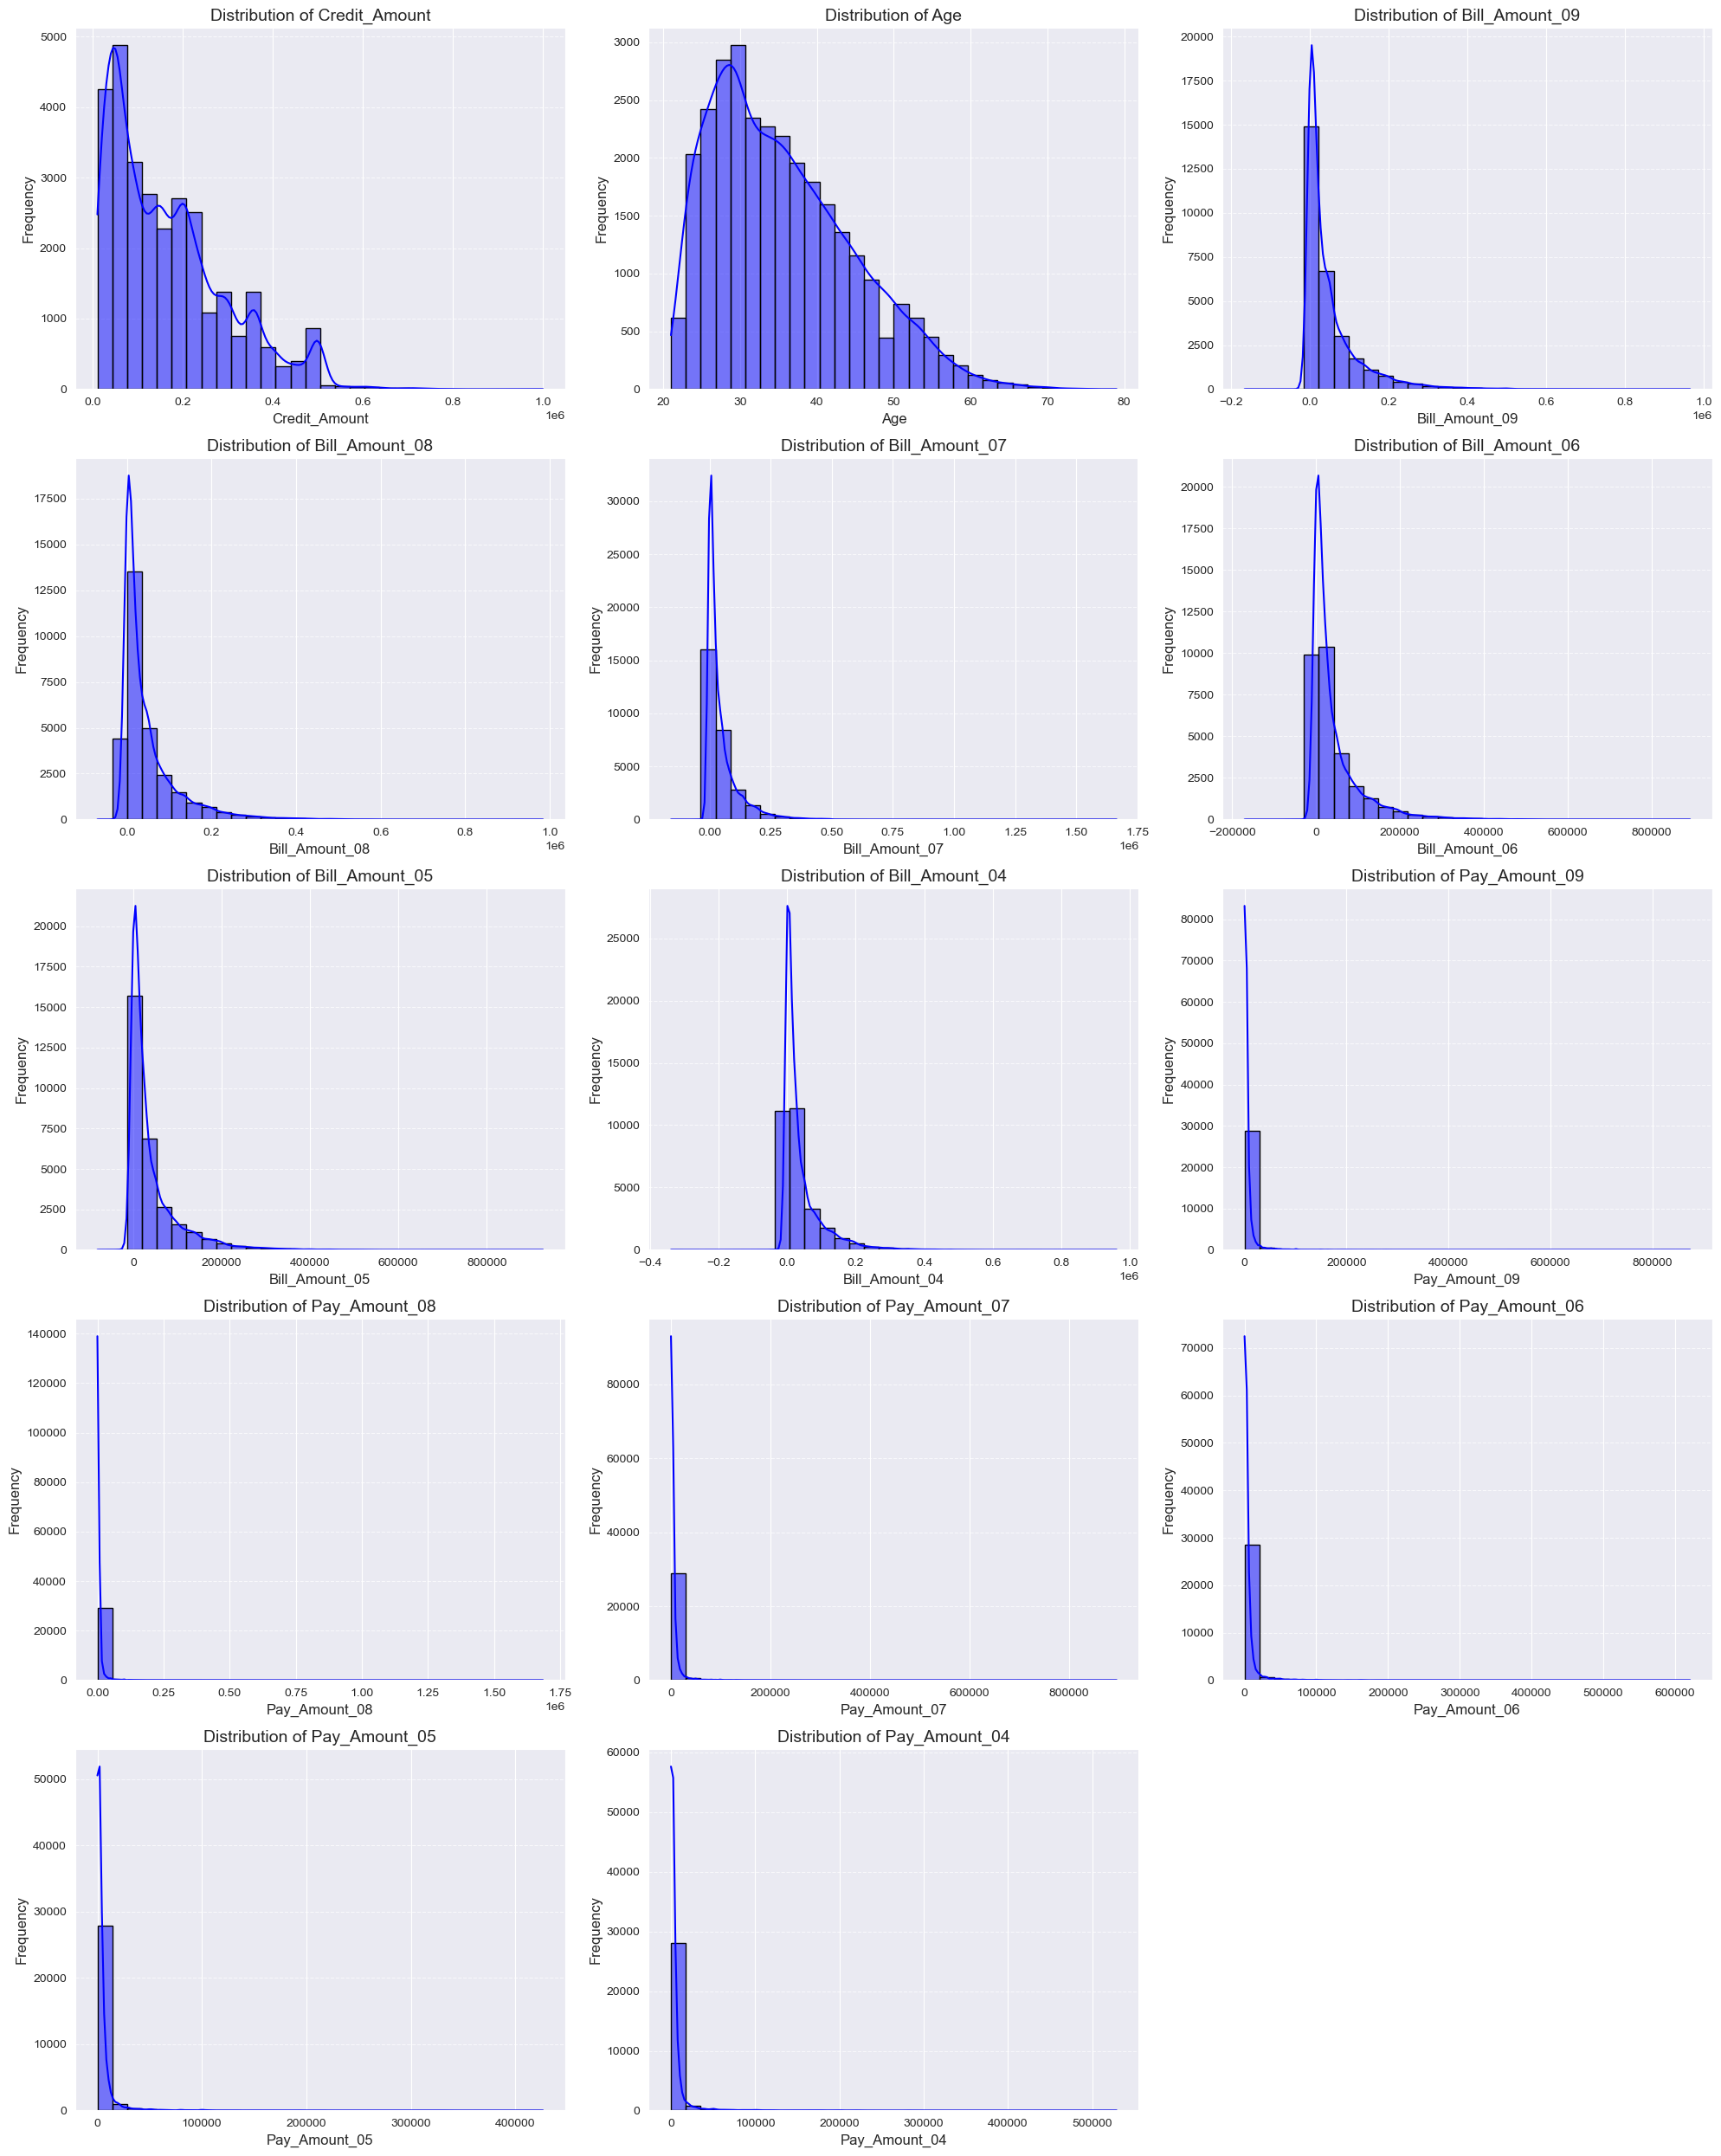

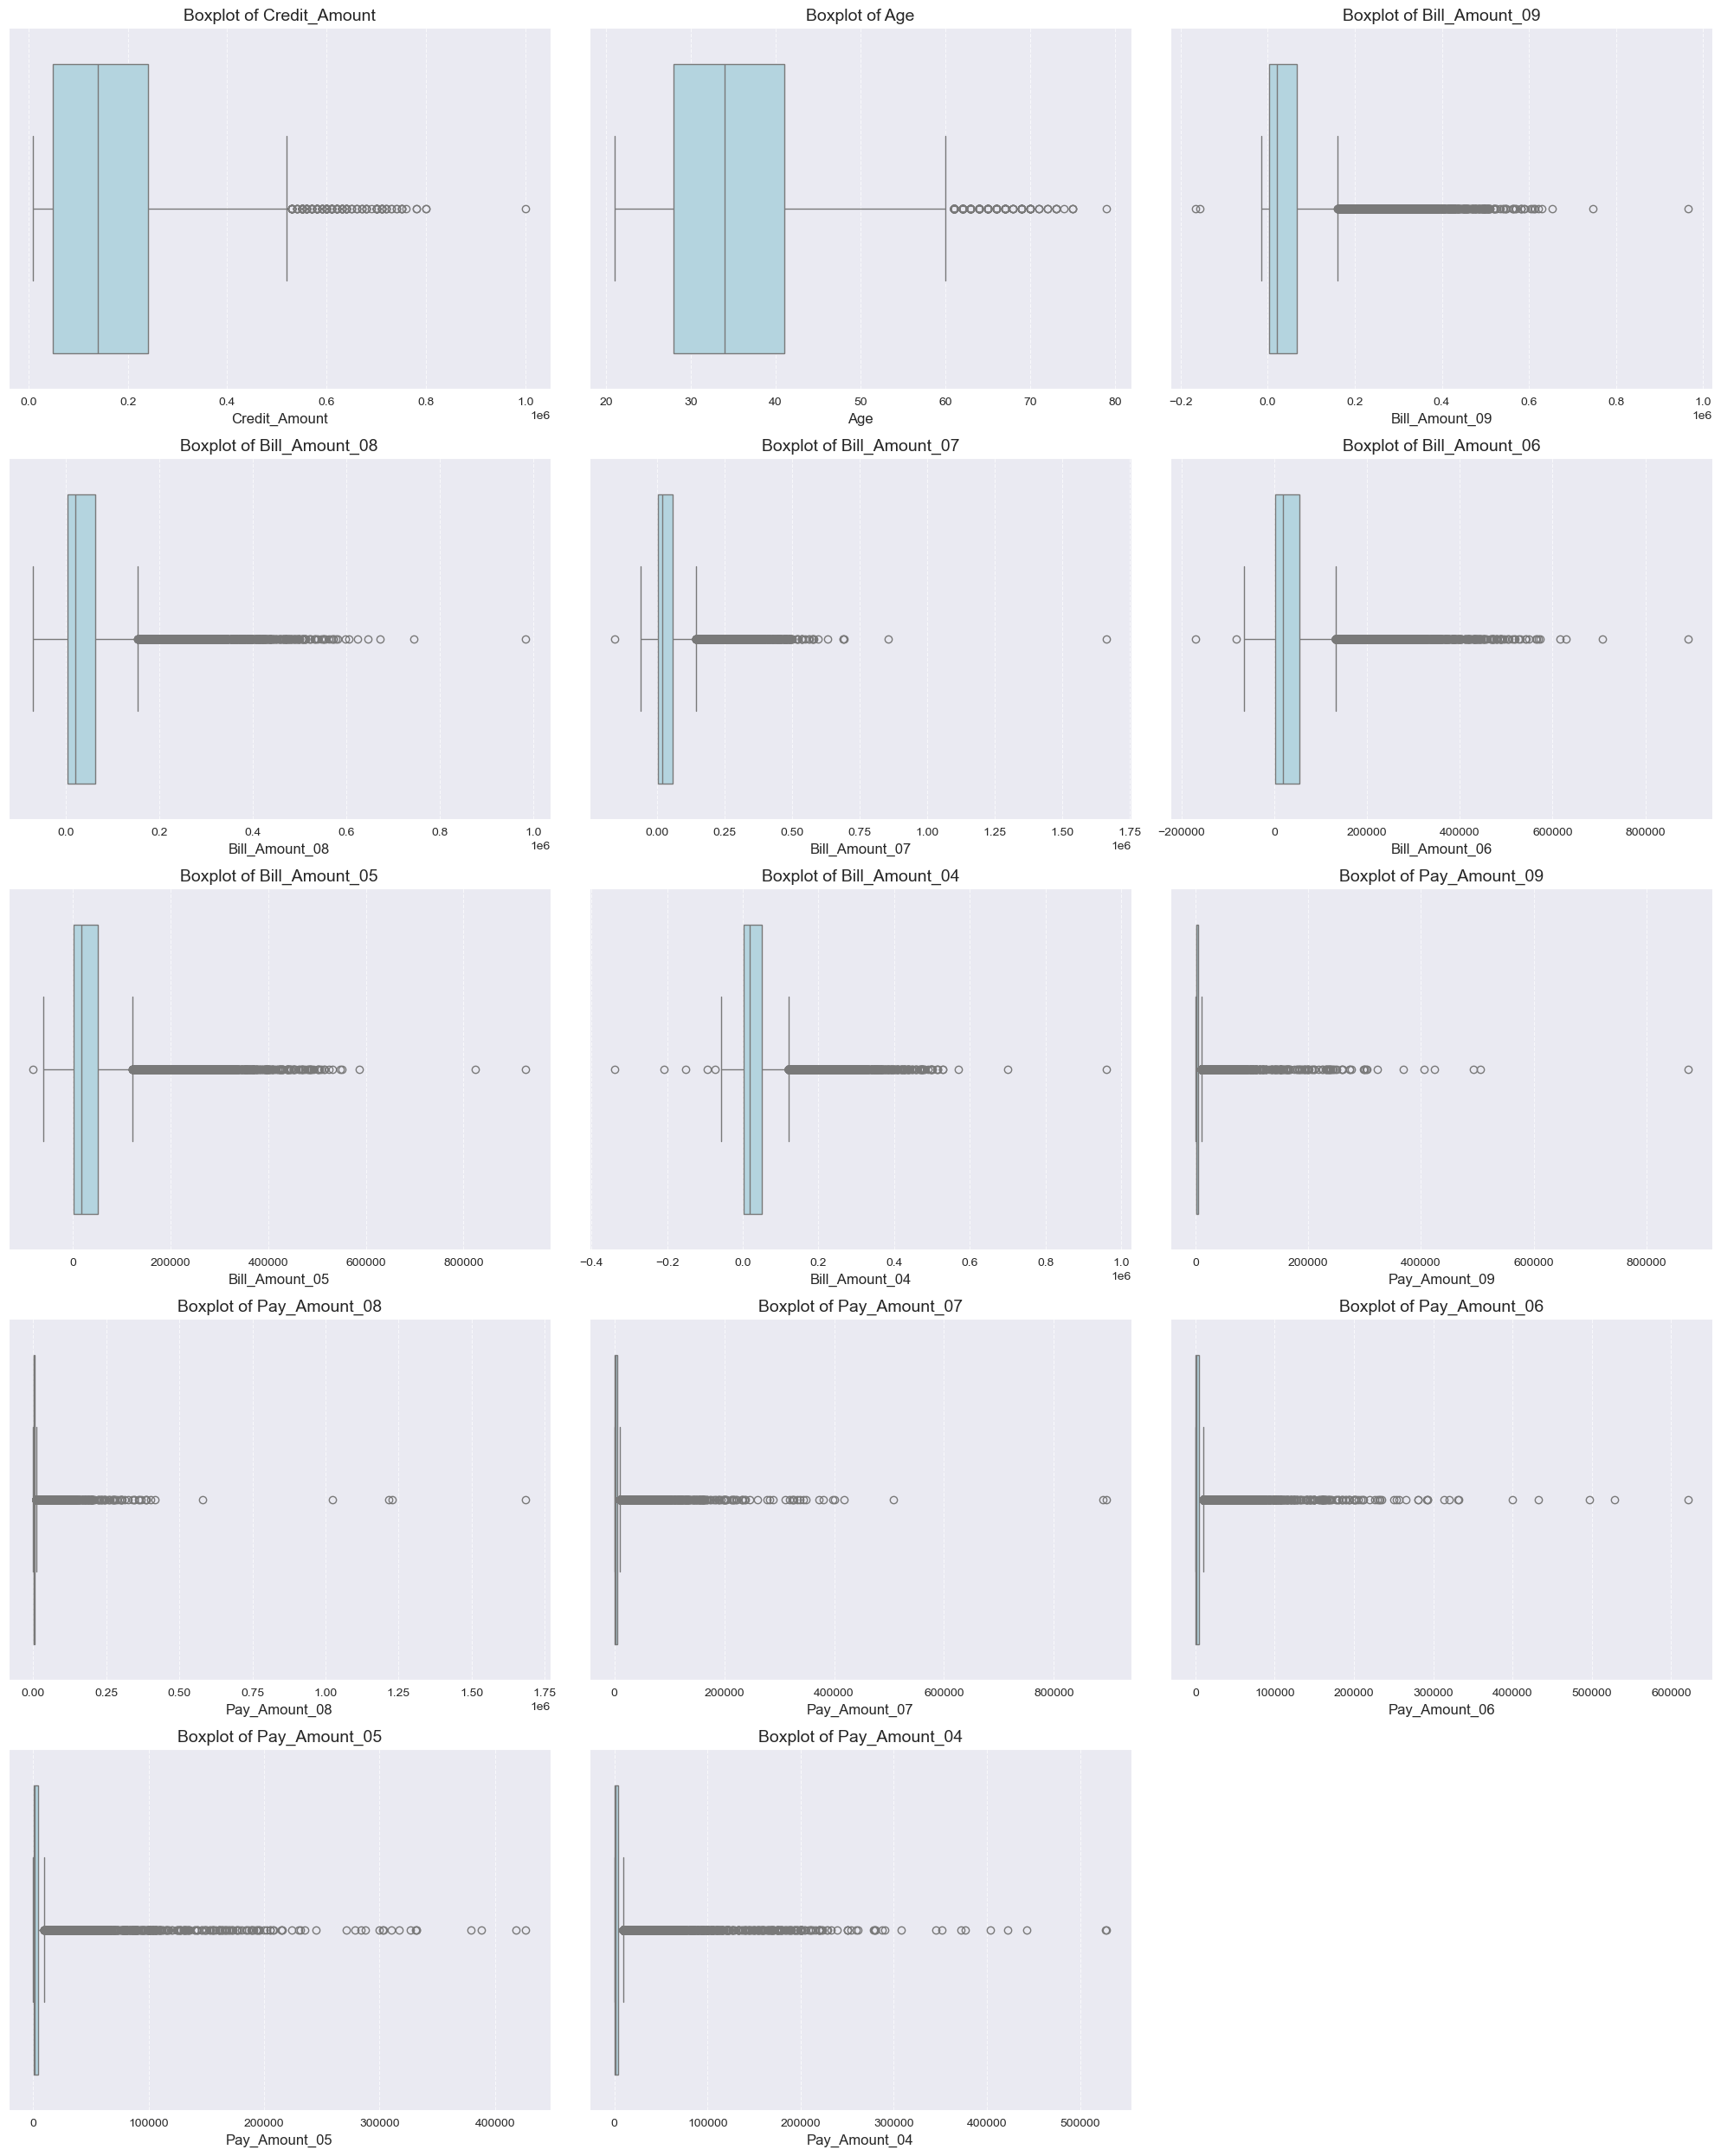

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['Credit_Amount', 'Age', 'Bill_Amount_09', 'Bill_Amount_08',
                     'Bill_Amount_07', 'Bill_Amount_06', 'Bill_Amount_05',
                     'Bill_Amount_04', 'Pay_Amount_09', 'Pay_Amount_08',
                     'Pay_Amount_07', 'Pay_Amount_06', 'Pay_Amount_05', 'Pay_Amount_04']

# Number of columns for subplots
n_cols = 3

# Plot histograms and KDE plots for numerical features
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot boxplots to check for outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], color='lightblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key Observations
- Credit_Amount: The distribution of credit amounts is right-skewed, with a peak around 50,000 NT dollars. This suggests that a significant portion of clients have lower credit amounts, with fewer clients having higher credit limits, possibly indicating higherincome customers or those with established creditworthiness.
- Age: The age distribution is relatively uniform, with a slight peak around 30 years old. This suggests that clients of various ages are represented in the dataset, with no clear dominant age group.
- Bill Amounts: The bill amount distributions for each month are right-skewed, with most clients having lower bill amounts. The skewness indicates that a few clients have very high bill amounts, potentially indicating high credit card usage or large expenses. These patterns could indicate varying levels of financial stress or credit dependency.
- Pay Amounts: The distribution of payment amounts is also right-skewed, with a peak at lower payment values. This suggests that many clients make lower payments, with fewer clients making higher payments. The fewer clients with high payments could indicate those clearing substantial portions of their balances, which might correlate with a lower risk of default.
- Outliers: The boxplots reveal several outliers in the bill and payment amounts for each month. These outliers likely correspond to clients with exceptionally high bill amounts or payments, reflecting distinctive spending or payment behaviors. Such extreme values could significantly influence the prediction of default risk, making them an important consideration for modeling. Proper handling of these outliers during preprocessing - whether by capping, transformation, or another approach - is essential to prevent them from skewing the model. However, these outliers might also carry valuable information, as they could represent unique cases such as high spenders, clients with irregular payment patterns, or those experiencing temporary financial difficulties.
- The distributions of credit amounts, bill amounts, and payment amounts provide insights into the financial behaviors of clients. Understanding these patterns can help in identifying factors that contribute to default risk and in developing predictive models to assess credit card default probability. Features like the relative size of bills and payments, along with credit amounts, might be highly predictive when combined with payment history (Pay_Status_*).

## Handling Outliers
Outliers can significantly impact the performance of machine learning models, especially those sensitive to data distribution. Outliers can distort the model's assumptions about the data, leading to suboptimal predictions. Therefore, it's essential to address outliers appropriately before training a model.
### Identifying Outliers
A common approach is to use the interquartile range (IQR):
- Outliers are values below  $Q1 - 1.5 * IQR$  or above  $Q3 + 1.5 * IQR$ .
### Decide on a strategy for handling outliers
1. **Capping**: Set a threshold to cap extreme values at a certain percentile or fixed value. This approach retains the information but prevents outliers from skewing the model.
2. **Transformation**: Apply a transformation to the data to reduce the impact of outliers. Common transformations include log transformation, square root transformation, or Box-Cox transformation.
3. **Removal**: Remove outliers from the dataset. This approach can be effective but risks losing valuable information, especially if the outliers represent genuine data points.
4. **Retain**: In some cases, outliers may carry predictive information, so they can be kept as-is. This approach is suitable when outliers represent unique cases that are relevant to the problem being addressed.

Removal of outliers is not ideal in financial data, as these extreme values often represent important edge cases (e.g., high-spenders or financially stressed clients).
In financial predictive models, it is common to encounter extreme outliers and skewed distributions due to the wide range of customer behaviors and financial circumstances. To address this, a combination of capping outliers and log transformations is often employed. Capping ensures that extreme values do not overly influence the model while retaining valuable information, while log transformations compress skewed distributions and normalize the data for better interpretability and improved model performance. This approach is widely used in credit risk modeling, fraud detection, and other financial analytics tasks, as it balances robustness and interpretability, ensuring reliable predictions and stakeholder trust.


In [81]:
# EDA.ipynb

# Import the preprocess_data function
from src.data_preprocessing import manage_outliers

# Preprocess the data
df = manage_outliers(df)

After handling the outliers, we can visualize the distributions of the numerical features again to observe the impact of the preprocessing steps.

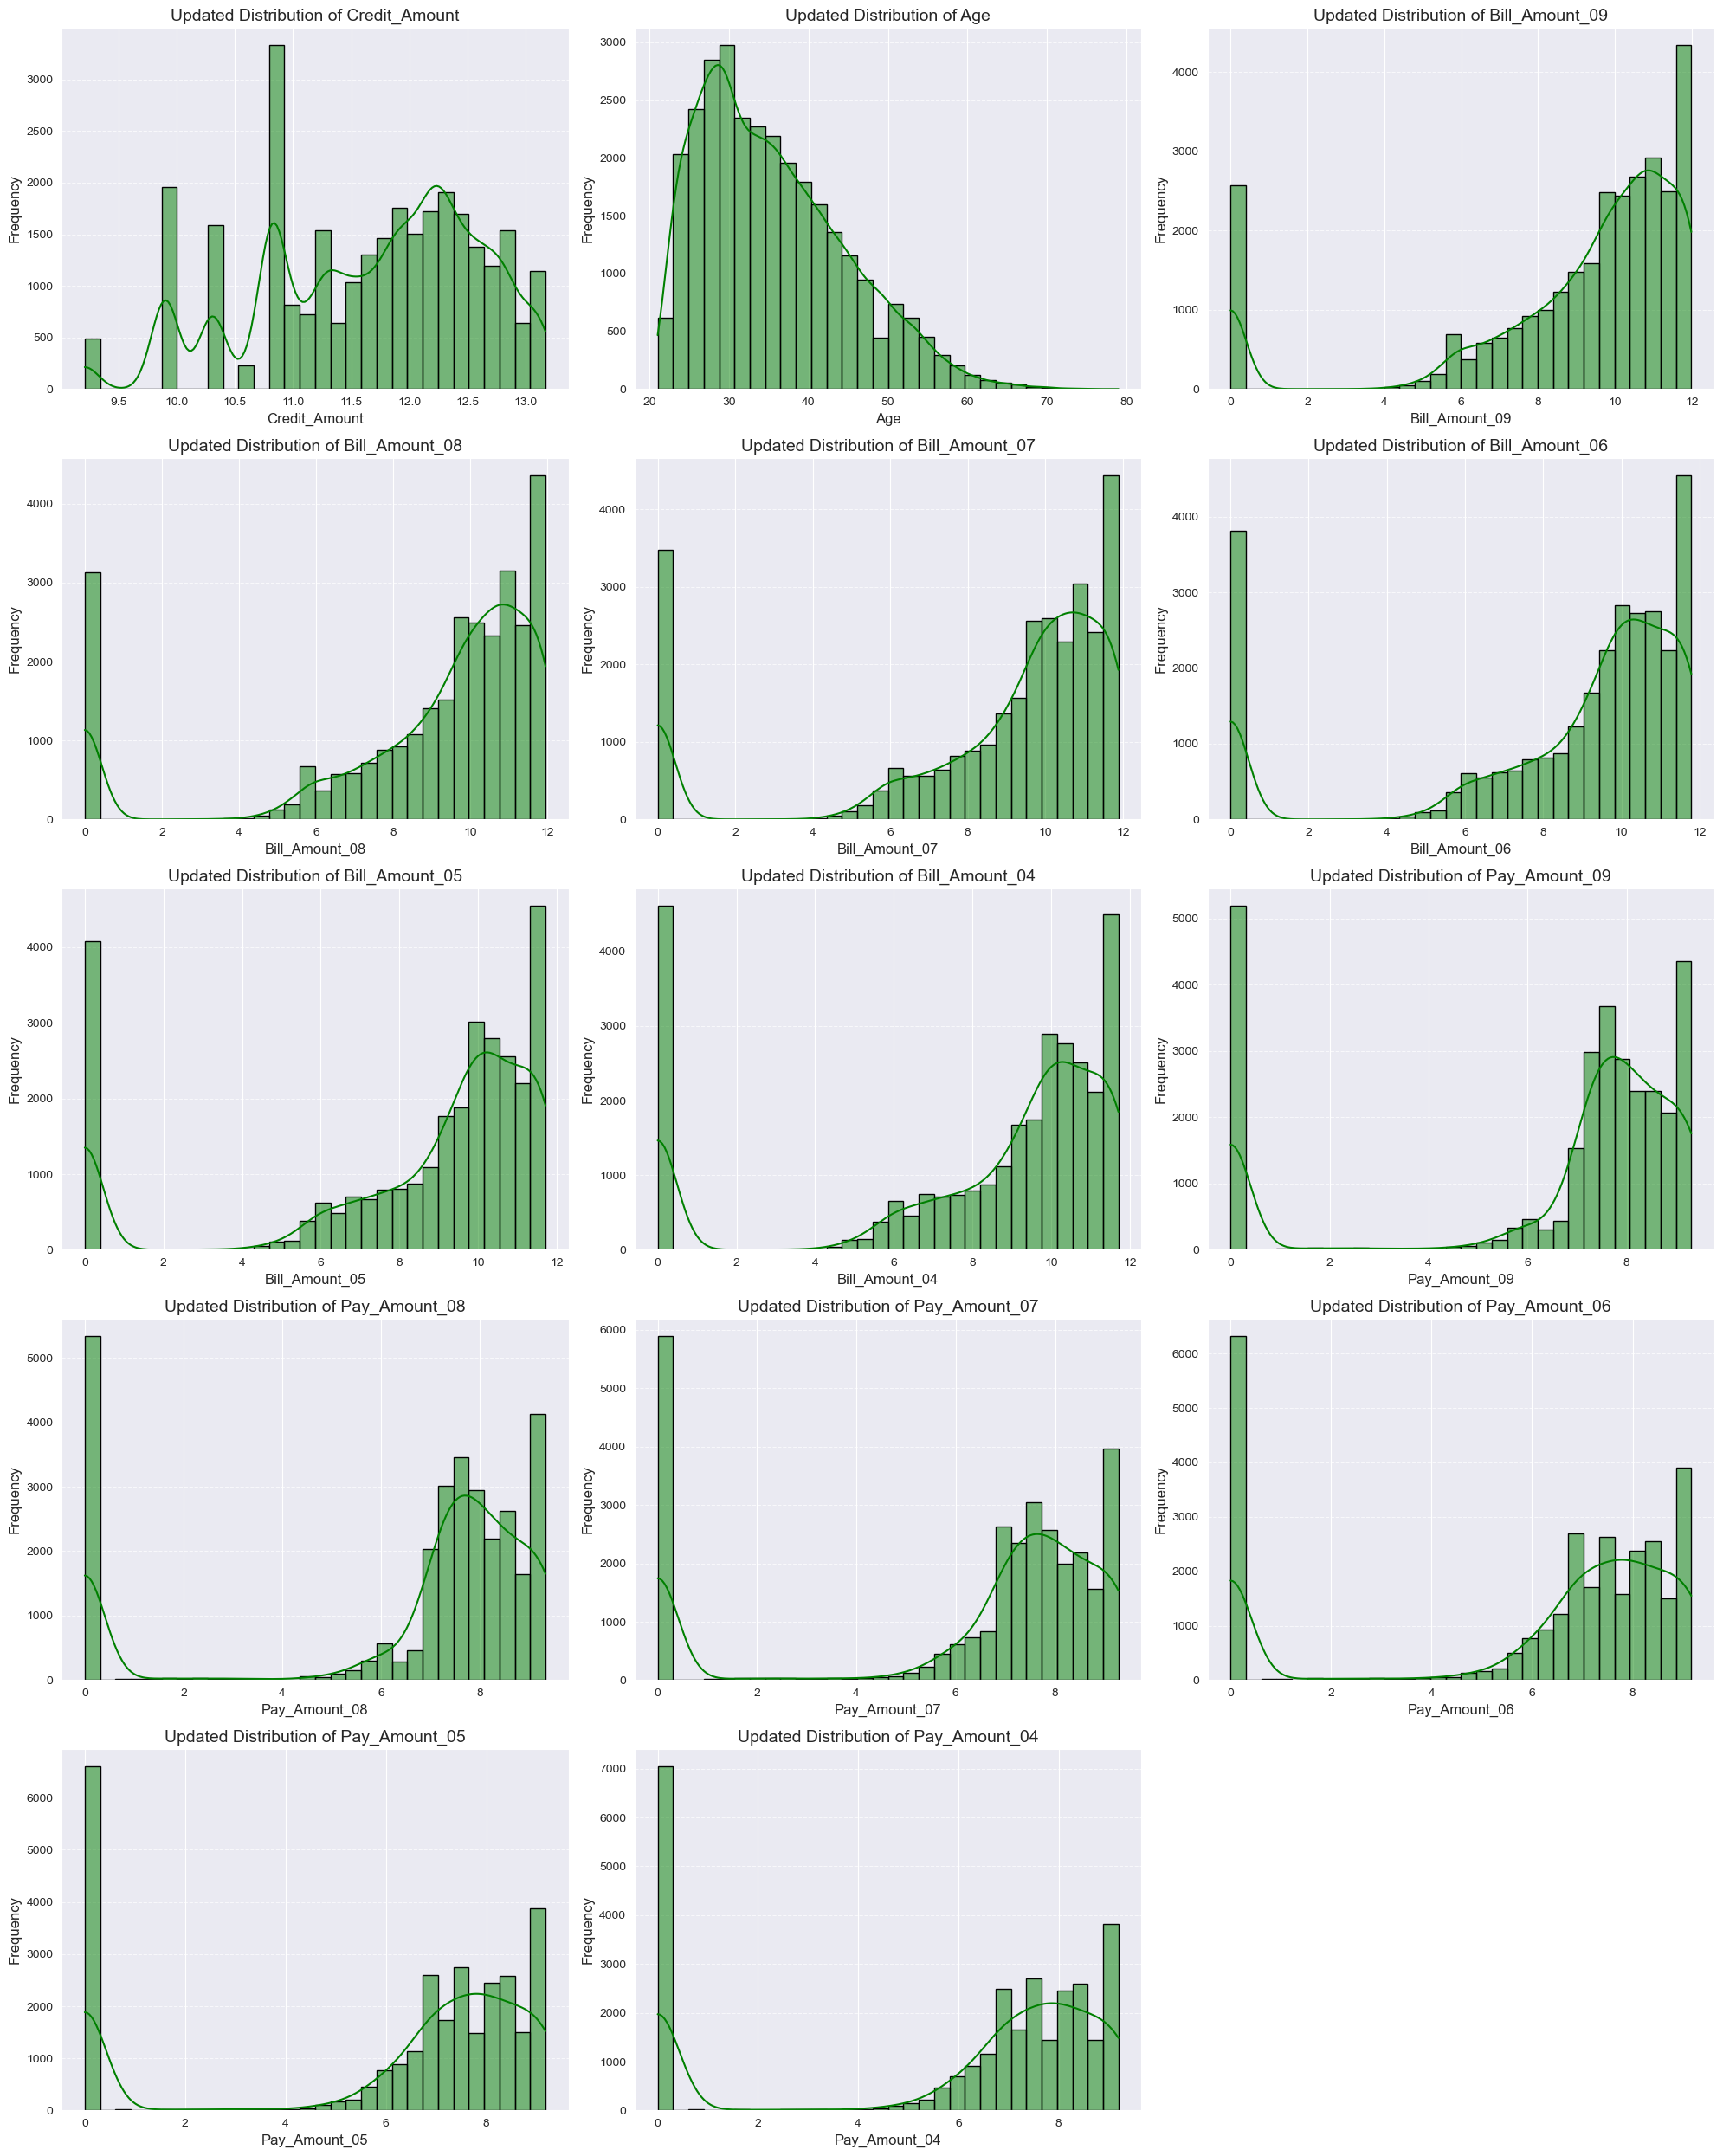

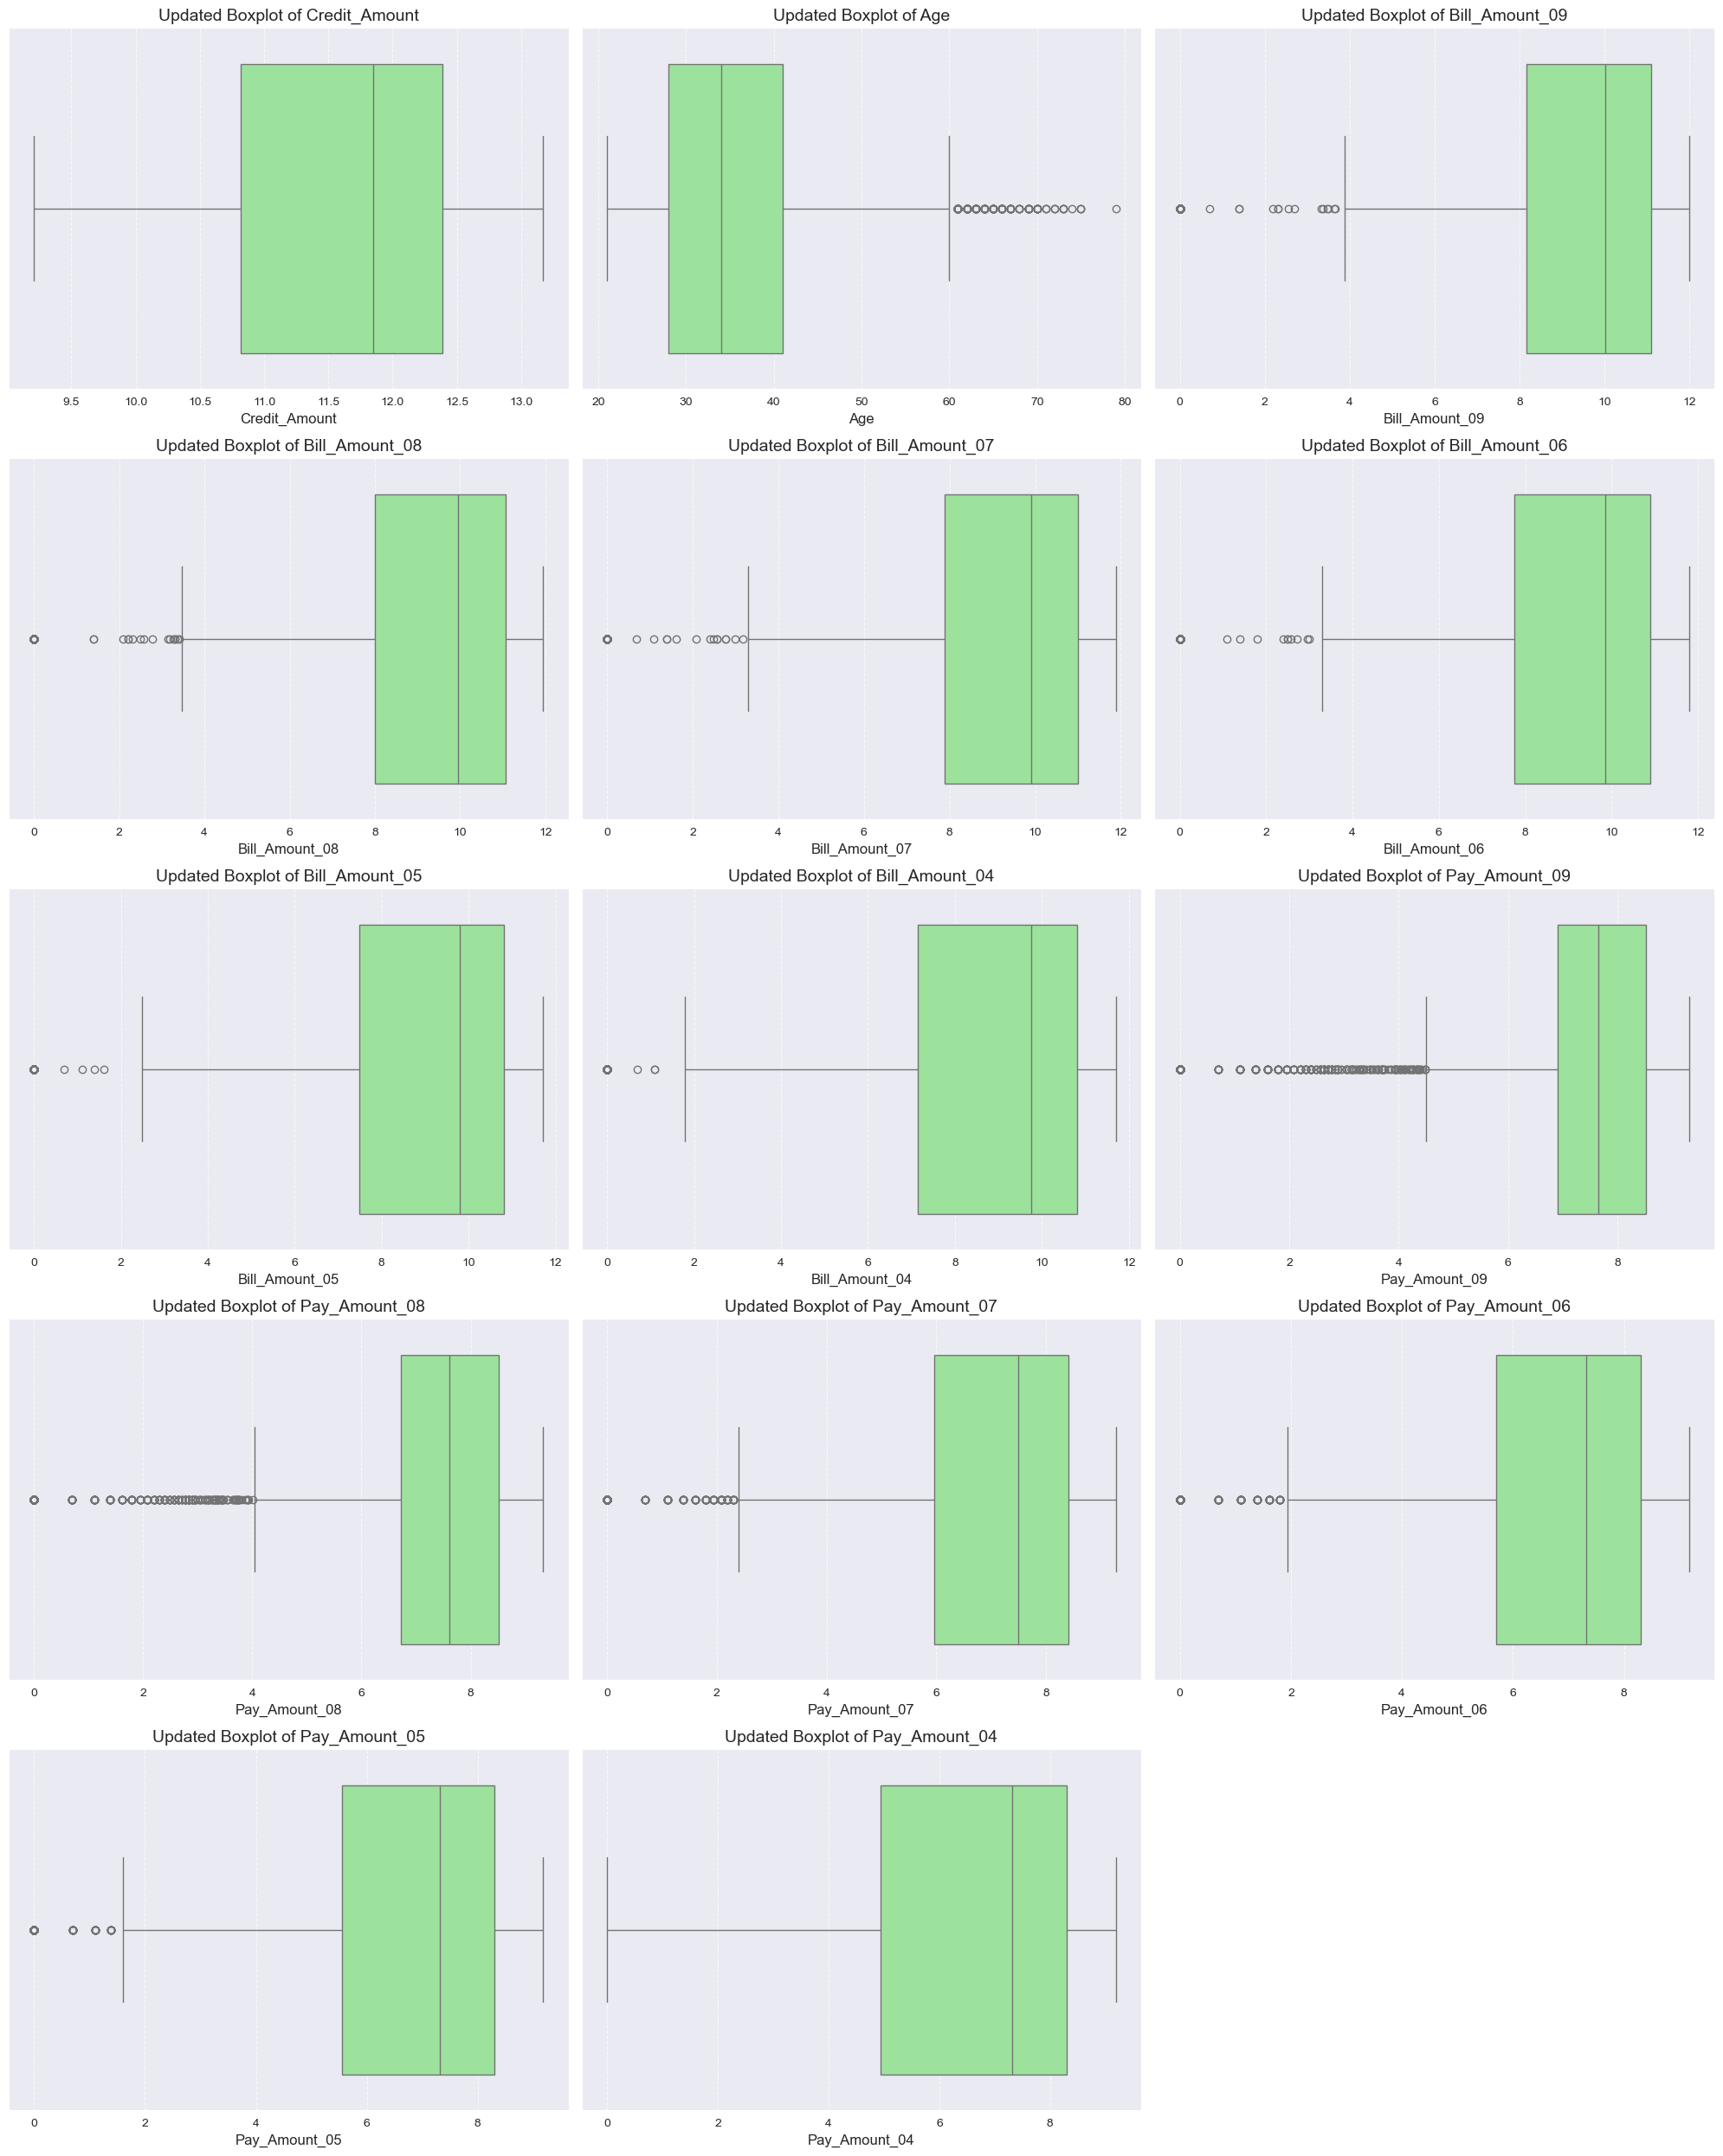

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['Credit_Amount', 'Age', 'Bill_Amount_09', 'Bill_Amount_08', 
                     'Bill_Amount_07', 'Bill_Amount_06', 'Bill_Amount_05', 
                     'Bill_Amount_04', 'Pay_Amount_09', 'Pay_Amount_08', 
                     'Pay_Amount_07', 'Pay_Amount_06', 'Pay_Amount_05', 'Pay_Amount_04']

# Number of columns for subplots
n_cols = 3

# Plot histograms and KDE plots for numerical features
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, color='green', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Updated Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot boxplots to check for remaining outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Updated Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The updated visualizations show the impact of handling outliers using capping. The distributions of the numerical features are more balanced, with fewer extreme values. The boxplots also indicate that the capping strategy has effectively reduced the number of outliers, making the data more suitable for modeling.

## Encoding Categorical Variables
### Identifying Categorical Variables
Categorical variables are those that represent discrete categories or groups. In our dataset, the following columns are categorical:
- Gender
- Education
- Marital_Status
- Pay_Status_09, Pay_Status_08, …, Pay_Status_04
- Default (already encoded as 0/1, no changes needed)

### Encoding techniques
1. **Label Encoding**: Assign a unique integer to each category. This approach is suitable for ordinal categories where the order matters.
2. **One-Hot Encoding**: Create binary columns for each category, indicating its presence (1) or absence (0). This approach is suitable for nominal categories where the order does not matter.

In [83]:
from src.data_preprocessing import encode_categorical_variables

# Encode categorical variables
encoded_df = encode_categorical_variables(df)

# Check the encoded dataset
print(encoded_df.head())
print(encoded_df.info())

   Credit_Amount  Age  Pay_Status_09  Pay_Status_08  Pay_Status_07  \
0       9.903538   24              4              4              1   
1      11.695255   26              1              4              2   
2      11.407576   34              2              2              2   
3      10.819798   37              2              2              2   
4      10.819798   57              1              2              1   

   Pay_Status_06  Pay_Status_05  Pay_Status_04  Bill_Amount_09  \
0              1              0              0        8.272315   
1              2              2              4        7.894691   
2              2              2              2       10.283293   
3              2              2              2       10.757711   
4              2              2              2        9.061608   

   Bill_Amount_08  ...  Pay_Amount_06  Pay_Amount_05  Pay_Amount_04  Default  \
0        8.040125  ...       0.000000       0.000000       0.000000        1   
1        7.453562  ...

In [84]:
#save modified dataset to csv

encoded_df.to_csv('../data/modified/cw_encoded.csv') 

The categorical variables have been successfully encoded using one-hot encoding, creating binary columns for each category. The resulting dataset is now suitable for machine learning models that require numerical input. The number of columns has increased due to the encoding process, with each unique category in a column now represented as a binary indicator. This transformation ensures that the model can interpret and learn from the categorical variables effectively.

## Feature Scaling
To ensure consistent feature magnitudes and improve model performance, we scaled the numerical features (Credit_Amount, Bill_Amount_*, Pay_Amount_*, etc.) and the ordinal Pay_Status_* columns using MinMaxScaler. This was done to normalize all values to a range between 0 and 1, which is particularly beneficial for models sensitive to feature ranges, like logistic regression, as it helps the optimization process converge more efficiently. While ordinal variables like Pay_Status_* do not strictly require scaling, including them ensures uniform treatment across all features and prevents features with larger ranges from disproportionately influencing the model. Binary variables (e.g., Gender, Education, Marital_Status) were left unscaled, as their values (0 or 1) are already normalized and meaningful for the model.

In [85]:
from src.data_preprocessing import scale_numerical_columns

# List of numerical columns
numerical_columns = [
    'Credit_Amount', 'Age', 'Bill_Amount_09', 'Bill_Amount_08', 
    'Bill_Amount_07', 'Bill_Amount_06', 'Bill_Amount_05', 'Bill_Amount_04', 
    'Pay_Amount_09', 'Pay_Amount_08', 'Pay_Amount_07', 'Pay_Amount_06', 
    'Pay_Amount_05', 'Pay_Amount_04', 
    'Pay_Status_09', 'Pay_Status_08', 'Pay_Status_07', 'Pay_Status_06', 
    'Pay_Status_05', 'Pay_Status_04'
]

# Scale numerical columns
scaled_df = scale_numerical_columns(encoded_df, numerical_columns)

# Verify the scaled data
print(scaled_df[numerical_columns].describe())

       Credit_Amount           Age  Bill_Amount_09  Bill_Amount_08  \
count   29601.000000  29601.000000    29601.000000    29601.000000   
mean        0.618933      0.249381        0.750414        0.737331   
std         0.237395      0.158849        0.269417        0.288055   
min         0.000000      0.000000        0.000000        0.000000   
25%         0.406330      0.120690        0.681252        0.669368   
50%         0.666285      0.224138        0.834851        0.833268   
75%         0.802370      0.344828        0.926277        0.925685   
max         1.000000      1.000000        1.000000        1.000000   

       Bill_Amount_07  Bill_Amount_06  Bill_Amount_05  Bill_Amount_04  \
count    29601.000000    29601.000000    29601.000000    29601.000000   
mean         0.729987        0.722844        0.714068        0.698273   
std          0.298358        0.307401        0.315058        0.328045   
min          0.000000        0.000000        0.000000        0.000000   
25% 

The data has been scaled appropriately for logistic regression. The consistency in the feature range will help the model handle features with different original scales more effectively.

In [86]:
#save modified dataset to csv
scaled_df.to_csv('../data/modified/cw_scaled.csv')

## Correlation Analysis
Correlation analysis is a crucial step in understanding the relationships between features and the target variable. By calculating the correlation coefficients between numerical features and the target variable (Default), we can identify which features are most strongly associated with default payments. This information is valuable for feature selection and model building, as highly correlated features are more likely to be predictive of the target variable.

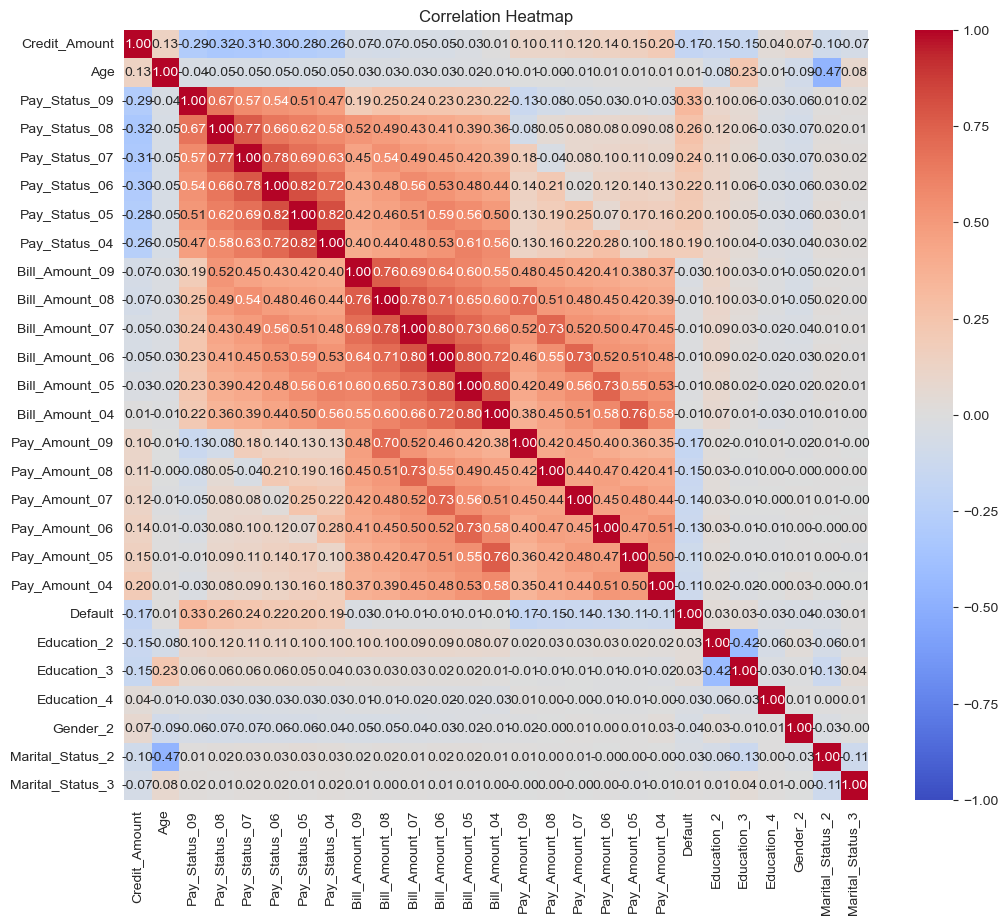

       Feature_1      Feature_2  Correlation
0  Pay_Status_06  Pay_Status_05     0.820086
1  Pay_Status_05  Pay_Status_06     0.820086
2  Pay_Status_05  Pay_Status_04     0.817037
3  Pay_Status_04  Pay_Status_05     0.817037


In [87]:
# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Identify feature pairs with high correlation
threshold = 0.8  # Define the correlation threshold
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Extract high correlation pairs into a DataFrame
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Save or display the high-correlation pairs
print(high_corr_pairs)
#high_corr_pairs.to_csv('high_correlation_pairs.csv', index=False)

### Key Observations
The heatmap provides a clear visualization of the correlations between all features. Features with higher correlations are shown in lighter colors (closer to 1), while lower correlations are darker (closer to 0). The diagonal line represents self-correlations, which are always 1.
We have two pairs of highly correlated features:
- Pay_status_06 and Pay_status_05: These features have a correlation coefficient of 0.82, indicating a strong positive correlation.
- Pay_status_05 and Pay_status_04: These features have a correlation coefficient of 0.817, indicating a strong positive correlation as well.
### Implications for Modeling
Highly correlated features can introduce multicollinearity, which can affect the model's stability and interpretability. In logistic regression, multicollinearity can lead to unstable coefficients, making it challenging to interpret the impact of individual features on the target variable. To address this issue, we can consider the following strategies:
1. **Feature Selection**: Remove one of the highly correlated features to reduce multicollinearity. This approach simplifies the model and prevents redundant information from influencing the coefficients.
2. **Dimensionality Reduction**: Apply techniques like Principal Component Analysis (PCA) to transform the features into uncorrelated components. This approach can help capture the most critical information while reducing multicollinearity.

In our case, we'll remove one of the highly correlated pairs to address multicollinearity and ensure the model's stability and interpretability.
Since Pay_Status_* features are sequential, they likely contain overlapping information. Dropping redundant columns like Pay_Status_05 and Pay_Status_04 simplifies the model without significantly losing predictive power. We decided not to remove Pay_Status_06 as it represents the most recent data and might be more relevant for predicting default payments.

In [88]:
# Drop the highly correlated features
# Remove Pay_Status_05 and Pay_Status_04 from the dataset
features_to_remove = ['Pay_Status_05', 'Pay_Status_04']

# Drop the selected features
scaled_df = scaled_df.drop(columns=features_to_remove, axis=1)

# Verify the remaining columns
print("Remaining columns in the dataset:")
print(scaled_df.columns)

Remaining columns in the dataset:
Index(['Credit_Amount', 'Age', 'Pay_Status_09', 'Pay_Status_08',
       'Pay_Status_07', 'Pay_Status_06', 'Bill_Amount_09', 'Bill_Amount_08',
       'Bill_Amount_07', 'Bill_Amount_06', 'Bill_Amount_05', 'Bill_Amount_04',
       'Pay_Amount_09', 'Pay_Amount_08', 'Pay_Amount_07', 'Pay_Amount_06',
       'Pay_Amount_05', 'Pay_Amount_04', 'Default', 'Education_2',
       'Education_3', 'Education_4', 'Gender_2', 'Marital_Status_2',
       'Marital_Status_3'],
      dtype='object')


In [89]:
# Save the final preprocessed dataset to a CSV file
scaled_df.to_csv('../data/modified/cw_final.csv', index=False)